#Imports

In [68]:
# importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from operator import itemgetter
# imports & enables zoom functionality for graphs
# import mpld3
# mpld3.enable_notebook()
# disables zoom functionality for graphs
# mpld3.disable_notebook()

#Read in Data and Establish Variables

##Setup Functions

In [2]:
def importData(myfile, myPath):
  """
  imports the data from the file to a dataframe
  myFile: string
    the name of the text file where the data is located, including the filetype suffix

  returns:
    imported dataframe
  """
  pathFull = myPath + "/" + myfile
  data = pd.read_csv(pathFull, header = None, skiprows=22)
  data.columns = my_cols
  return data

In [3]:
def derivative(x,y):
  """
  inputs x and y lists and returns the x and y lists for that graph's derivative:
  reduces the length of x by 1 and takes the derivative of y
  x: list, array
  y: list, array
    the x and y lists for a graph

  returns:
    the modified x and y lists
  """
  dydx = np.diff(y)/np.diff(x)
  dydx_x = x[:-1]
  return dydx_x, dydx

In [4]:
def generateDerivatives(data):
  """
  creates dataframes for the derivatives of a dataframe's columns
  data: dataframe
    the name of the text file where the data is located, including the filetype suffix

  returns:
    der1: the first derivative of the columns of data
    der2: the second derivative of the columns of data
  """
  der1 = pd.DataFrame()
  der2 = pd.DataFrame()

  # create derivative 1
  der1 = pd.concat([der1, data["bs"][:-1]], axis=1)
  der1 = pd.concat([der1, data[Milliseconds][:-1]], axis=1)
  for col in data.columns[2:]:
    column = data[col]
    x = []
    x, column_der = derivative(data[Milliseconds], column)
    column_der = pd.Series(column_der)
    der1 = pd.concat([der1, column_der.rename(col)], axis=1)

  # create derivative 2
  der2 = pd.concat([der2, data["bs"][:-2]], axis=1)
  der2 = pd.concat([der2, data[Milliseconds][:-2]], axis=1)
  for col in der1.columns[2:]:
    column = der1[col]
    x = []
    x, column_der2 = derivative(der1[Milliseconds], column)
    column_der2 = pd.Series(column_der2)
    der2 = pd.concat([der2, column_der2.rename(col)], axis=1)

  return der1, der2

##Establish Variables

In [5]:
# setting column titles corresponding to the blendshapes
my_cols = ['bs', 'Nano seconds', 'head x', 'head y', 'head z', 'EA x', 'EA y',
       'EA z', 'LE x', 'LE y', 'RE x', 'RE y', 'browInnerUp', 'browDown_L',
       'browDown_R', 'browOuterUp_L', 'browOuterUp_R', 'eyeLookUp_L',
       'eyeLookUp_R', 'eyeLookDown_L', 'eyeLookDown_R', 'eyeLookIn_L',
       'eyeLookIn_R', 'eyeLookOut_L', 'eyeLookOut_R', 'eyeBlink_L',
       'eyeBlink_R', 'eyeSquint_L', 'eyeSquint_R', 'eyeWide_L', 'eyeWide_R',
       'cheekPuff', 'cheekSquint_L', 'cheekSquint_R', 'noseSneer_L',
       'noseSneer_R', 'jawOpen', 'jawForward', 'jawLeft', 'jawRight',
       'mouthFunnel', 'mouthPucker', 'mouthLeft', 'mouthRight',
       'mouthRollUpper', 'mouthRollLower', 'mouthShrugUpper',
       'mouthShrugLower', 'mouthClose', 'mouthSmile_L', 'mouthSmile_R',
       'mouthFrown_L', 'mouthFrown_R', 'mouthDimple_L', 'mouthDimple_R',
       'mouthUpperUp_L', 'mouthUpperUp_R', 'mouthLowerDown_L',
       'mouthLowerDown_R', 'mouthPress_L', 'mouthPress_R', 'mouthStretch_L',
       'mouthStretch_R', 'tongueOut']

In [6]:
# defining pairs of columns
colPairs = {
  'EulerAngles': ['EA x', 'EA y'],
  'EyeX':['LE x', 'RE x'],
  'EyeY': ['LE y', 'RE y'],
  'browDown':['browDown_L', 'browDown_R'],
  'browOuterUp':['browOuterUp_L', 'browOuterUp_R'],
  'eyeLookUp':['eyeLookUp_L', 'eyeLookUp_R'],
  'eyeLookDown':['eyeLookDown_L', 'eyeLookDown_R'],
  'eyeLookIn':['eyeLookIn_L', 'eyeLookIn_R'],
  'eyeLookOut':['eyeLookOut_L', 'eyeLookOut_R'],
  'eyeBlink':['eyeBlink_L', 'eyeBlink_R'], 
  'eyeSquint':['eyeSquint_L', 'eyeSquint_R'], 
  'eyeWide':['eyeWide_L', 'eyeWide_R'],
  'cheekSquint':['cheekSquint_L', 'cheekSquint_R'], 
  'noseSneer':['noseSneer_L', 'noseSneer_R'], 
  'jaw':['jawLeft', 'jawRight'],
  'mouth':['mouthLeft', 'mouthRight'],
  'mouthRoll':['mouthRollUpper', 'mouthRollLower'] ,
  'mouthShrug':['mouthShrugUpper',  'mouthShrugLower'], 
  'mouthSmile':['mouthSmile_L', 'mouthSmile_R'],
  'mouthFrown':['mouthFrown_L', 'mouthFrown_R'], 
  'mouthDimple':['mouthDimple_L', 'mouthDimple_R'],
  'mouthUpper':['mouthUpperUp_L', 'mouthUpperUp_R'],
  'mouthLower':['mouthLowerDown_L','mouthLowerDown_R'], 
  'mouthPress':['mouthPress_L', 'mouthPress_R'], 
  'mouthStretch':['mouthStretch_L','mouthStretch_R']
}

In [7]:
# defines Milliseconds as the string of the millisecond column
Milliseconds = my_cols[1]
# defining the location of the folder where data is stored
myPath = '/content/drive/Othercomputers/My MacBook Pro/Desktop Synced'

##Reading in Data

In [8]:
#importing the data tables to dataframes
data = importData('NormalFace1.txt', myPath)
data2 = importData('FC_2021-12-24_15-28-16_dad.txt', myPath)
data3 = importData('FC_2022-3-25_15-36-43_ bells follow up. .txt', myPath)
data4 = importData('FC_2022-4-17_11-29-48_ ino normal.txt', myPath+'/4-17-22')
data5 = importData('FC_2022-4-16_10-33-55_ pakinsons with jaw tremor.txt', myPath+'/4-17-22')
data6 = importData('FC_2022-5-14_11-10-29_titubation db.txt', myPath)
data7 = importData('FC_2022-5-18_13-23-14_ino dr left.txt', myPath+'/5-22-22')
data8 = importData('FC_2022-5-23_0-20-50_ ino normal.txt', myPath+'/5-22-22')
data9 = importData('FC_2022-5-26_11-16-51_ia ino left nysagmus.txt', myPath)
data10 = importData('FC_2022-7-17_18-39-51_ cross.txt', myPath)
data11 = importData('FC_2022-4-16_10-57-44_ partial right left ino.txt', myPath)
data12 = importData('FC_2022-5-18_13-23-14_ino dr left.txt', myPath)
data13 = importData('FC_2022-5-26_11-16-51_ia left cimplex nystag. bilat inos.txt', myPath)

In [9]:
# creating derivative dataframes
data_vel, data_accel = generateDerivatives(data)
data2_vel, data2_accel = generateDerivatives(data2)
data3_vel, data3_accel = generateDerivatives(data3)
data4_vel, data4_accel = generateDerivatives(data4)
data5_vel, data5_accel = generateDerivatives(data5)
data6_vel, data6_accel = generateDerivatives(data6)
data7_vel, data7_accel = generateDerivatives(data7)
data8_vel, data8_accel = generateDerivatives(data8)
data9_vel, data9_accel = generateDerivatives(data9)
data10_vel, data10_accel = generateDerivatives(data10)
data11_vel, data11_accel = generateDerivatives(data11)
data12_vel, data12_accel = generateDerivatives(data12)
data13_vel, data13_accel = generateDerivatives(data13)

#Graphing & Analysis

##Graph Column or ColPair Section (FINAL)

In [10]:
def GraphColumnsSection(colTitles = [], df = data, together = False, xstart = 0, xend = None):
  """
  graphs the given columns from the given dataframe, with a restricted x axis
  colTitles: list, array
    a list or array of all names of columns which will be graphed
  df: dataframe
    the dataframe that the columns will be from
  together: boolean
    Whether or not the graphs will be overlayed or not
  xstart: integer
    The lowest value for the x axis
  xend: integer
    The highest value for the x axis
  """
  # if xend is not input
  if xend == None:
    # set the maximum x value to the highest it can be with the given dataframe
    xend = max(df[Milliseconds])
  # if together is True, graph both graphs on the same axis
  if together:
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    for colTitle in colTitles:
      ax.plot(df[Milliseconds], df[colTitle], label = colTitle)
      ax.legend()
      ax.set_xlim(xstart, xend)
  # otherwise, graph them on different axes
  else:
    fig, ax = plt.subplots(len(colTitles), 1, figsize = (8, 6*len(colTitles)))
    for i in range(len(colTitles)):
      ax[i].plot(df[Milliseconds], df[colTitles[i]], label = colTitles[i])
      ax[i].legend()
      ax[i].set_xlim(xstart, xend)

In [11]:
def GraphColPairsSection(pairs = [], df = data, xstart = 0, xend = None):
  """
  graphs the given column pairs from the given dataframe, with a restricted x axis
  pairs: list, array
    a list or array of all names of column pairs which will be graphed
  df: dataframe
    the dataframe that the columns will be from
  xstart: integer
    The lowest value for the x axis
  xend: integer
    The highest value for the x axis
  """
  # if xend is not input
  if xend == None:
    # set the maximum x value to the highest it can be with the given dataframe
    xend = max(df[Milliseconds])
  # create figure and axis
  fig, ax = plt.subplots(1, 1, figsize = (8, 6))
  # graph each pair with the restricted x axis
  for pairName in pairs:
    colPairs[pairName][0]
    ax.plot(df[Milliseconds], df[colPairs[pairName][0]], label = colPairs[pairName][0])
    ax.plot(df[Milliseconds], df[colPairs[pairName][1]], label = colPairs[pairName][1])
    ax.legend()
    ax.set_xlim(xstart, xend)

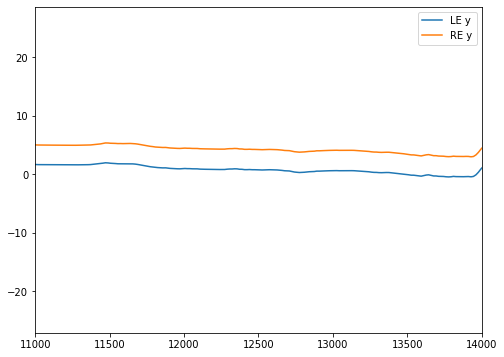

In [12]:
GraphColPairsSection(['EyeY'], data10, 11000, 14000)

##Graph Plot Data

In [13]:
def graphPlotData(dataTitle=[Milliseconds], veloc=False, accel=False):
  """
  graphs the desired column of data with its derivative 
  optionally graphs velocity as well
  optionally graphs acceleration as well
  dataTitle: list, array
    A list or array composed of strings that are the names of columns in data
  veloc: Boolean
    If true, graphs velocity additionally
  accel: Boolean
    If true, graphs acceleration additionally

  returns:
    a figure with the specified options

  example:
  fig, ax = graphPlotData(['browDown_L'], True, True)
  fig.show()
  """
  #increase graph size if plotting velocity, acceleration
  if veloc == True and accel == True:
    extraDer = 3
    figsize=(27, 6)
  elif (veloc == True and accel == False) or (veloc == False and accel == True):
    extraDer = 2
    figsize=(18, 6)
  elif veloc == False and accel == False:
    extraDer = 1
    figsize=(9, 6)

  #creating the plot with 1 row, extraDer columns, and the above established figure size
  fig, ax = plt.subplots(1, extraDer, figsize = figsize)
  
  #traverses the array and performs the following for all entries in the array
  for cols in dataTitle:
    #error-catching for invalid "bs" column
    if cols == my_cols[0]:
      cols = Milliseconds
      print('Error: Cannot graph \'bs\'')
    # if only position, do not treat ax as a list
    if extraDer == 1:
      x=data[Milliseconds]
      y=data[cols]
      ax.plot(x,y, label=cols)
      ax.set_title('Position')
      ax.legend()
      return fig, ax
    #graphs a given column's data in velocity and acceleration
    x=data[Milliseconds]
    y=data[cols]
    ax[0].plot(x,y, label=cols)
    ax[0].set_title('Position')
    ax[0].legend()
    # graphs velocity
    if veloc == True:
      der_x, der_y = derivative(x,y)
      ax[1].plot(der_x,der_y, label=cols)
      ax[1].set_title('Velocity')
      ax[1].legend()
    #graphs acceleration
    if accel == True:
      der_x, der_y = derivative(x,y)
      der2_x, der2_y = derivative(der_x, der_y)
      ax[-1].plot(der2_x, der2_y, label=cols)
      ax[-1].set_title('Acceleration')
      ax[-1].legend()
  return fig, ax

##Graph All (FINAL)

In [14]:
def graphAll(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  if skinnyGraph == True:
    totalRows, totalColumns, figsize = skinnyGraphSizesFull(dfs)
  else:
    totalRows, totalColumns, figsize = squareGraphSizesFull(dfs)
  
  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)

  if scaled == True:
    plt.setp(ax, ylim = (0, 1))

  graphCol(dfs, titles, ax, totalRows, totalColumns)
  # return fig

In [15]:
def graphAllToFile(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  if skinnyGraph == True:
    totalRows, totalColumns, figsize = skinnyGraphSizesFull(dfs)
  else:
    totalRows, totalColumns, figsize = squareGraphSizesFull(dfs)
  
  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)

  if scaled == True:
    plt.setp(ax, ylim = (0, 1))

  graphCol(dfs, titles, ax, totalRows)
  saveGraph(fig, "AllGraphs")

###Internal Functions

In [16]:
def skinnyGraphSizesFull(dfs = []): 
  totalRows = len(dfs[0].columns)-2
  totalColumns = len(dfs)
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [17]:
def squareGraphSizesFull(dfs = []):
  totalGraphsNum = len(dfs)*(len(dfs[0].columns)-2)
  totalRows = math.floor(math.sqrt(totalGraphsNum))
  totalColumns = math.ceil(totalGraphsNum/totalRows)
  while totalColumns % len(dfs) != 0:
      totalColumns+=1
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [18]:
def graphCol(dfs = [], titles = [], ax = "Placeholder", totalRows = 20, totalColumns = 9):
  row = 0
  column = 0
  colTitles = dfs[0].columns[2:]
  if totalColumns > 1:
    for col in colTitles:
      for i in range(0, len(dfs)):
        x=dfs[i][Milliseconds]
        y=dfs[i][col]

        ax[row, column+i].plot(x,y, label=col)
        ax[row, column+i].set_title(f'{titles[i]}')
        ax[row, column+i].legend()
      row+=1
      if row%totalRows==0:
        row = 0
        column+=len(dfs)
  # else:
  #   for col in colTitles:
  #     x=dfs[0][Milliseconds]
  #     y=dfs[0][col]

  #     ax[row].plot(x,y, label=col)
  #     ax[row].set_title(f'{titles[0]}')
  #     ax[row].legend()
  #     row+=1

##Fourier Transform Functions (FINAL)

In [19]:
def compareFourierTransforms(dfs = [], titles = [], skinnyGraph = True):
  if skinnyGraph == True:
    totalRows, totalColumns, figsize = FourierskinnyGraphSizes(dfs)
  else:
    totalRows, totalColumns, figsize = FouriersquareGraphSizes(dfs)

  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)

  for i in range(len(dfs)):
    for j in range(len(my_cols[12:])):
      FFT = np.fft.fft(dfs[i][my_cols[j+12]])
      freq = np.arange(len(dfs[i][Milliseconds]))/dfs[i][Milliseconds][len(dfs[i][Milliseconds])-1] # scale by dividing by max time
      ax[j].plot(freq,np.abs(FFT))
      ax[j].set_title(f"{titles[i]}, {[my_cols[j+12]]}")

  display(fig)
  return fig

In [20]:
def fourierTransform(df = data):
  for col in my_cols[2:]:
    SecondsfromNano = df[Milliseconds]/1000
    
    FFT = np.fft.fft(df[col])
    freq = np.arange(len(SecondsfromNano))/SecondsfromNano[len(SecondsfromNano)-1] # scale by dividing by max time
    fig, ax = plt.subplots(1,1, figsize = (10,8))
    ax.set_xlim(0, 30)
    ax.plot(freq,np.abs(FFT))
    ax.set_title(col)

In [21]:
def fourierTransformInterval(df = data, col = "LE x", startinit = 0, endinit = 10000, xlim = (0, 30), ylim = None):
  start = findInDf(startinit, df)
  end = findInDf(endinit, df)

  SecondsfromNano = df[Milliseconds][start:end]/1000

  FFT = np.fft.fft(df[col][start:end])
  freq = np.arange(len(SecondsfromNano))/(SecondsfromNano[end-1]-SecondsfromNano[start]) # scale by dividing by max time
  fig, ax = plt.subplots(1,1, figsize = (10,8))
  ax.set_xlim(xlim)
  if ylim != None:
    ax.set_ylim(ylim)
  ax.plot(freq,np.abs(FFT))
  ax.set_title(col)
  plt.show()

###Internal Functions

In [22]:
def FouriersquareGraphSizes(dfs = []):
  totalGraphsNum = len(dfs)*len(my_cols[12:])
  totalRows = math.floor(math.sqrt(totalGraphsNum))
  totalColumns = math.ceil(totalGraphsNum/totalRows)
  while totalColumns % len(dfs) != 0:
      totalColumns+=1
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [23]:
def FourierskinnyGraphSizes(dfs = []): 
  totalRows = len(my_cols[12:])
  totalColumns = len(dfs)
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

#Averages

In [24]:
def averageDataInterval(dataTitle=[Milliseconds], start=0, end=3000):
  """
  prints the average of the values for each of the given columns over the given interval
  dataTitle: list
    a list of strings that are column names
  start: int
    the starting number in Milliseconds to begin averaging points at
  end: int
    the ending number in Milliseconds to begin averaging points at
  
  returns:
    none
    
  example:
    averageDataInterval([Milliseconds, 'browDown_L'], 0, 2000)
  """
  # out of bounds error checking
  if start>3008 or start<0 or end>3008 or start>=end:
    print('Error: Out of Bounds')
    return None

  # correct starting values in Milliseconds
  start = findInData(start)
  end = findInData(end)
  # print interval range
  print(f"Averages over the interval [{data[Milliseconds][start]}, {data[Milliseconds][end]}]:")
  # for each column calculate and print averages
  for cols in dataTitle:
    #bs column error checking
    if cols == my_cols[0]:
      cols = Milliseconds
      print('Error: Cannot average \'bs\'')
    # calculate and print average value for a given column
    averageOverInterval = np.average(data[cols][start:end])
    print(f"{cols}: {averageOverInterval}")

##Average To File (FINAL)

In [25]:
def averageValuesToFile(dfs = [], names = [], individualColPairs = False):
  avgValuesFrame = averageValuesFrame(dfs, names, individualColPairs)
  avgValuesFrame.to_csv(f"{myPath}/data & data2/AverageValues.csv")

##Internal Functions

In [26]:
def covertValuesToArray(dictionary = colPairs):
  propertyColumn = list(dictionary.values())
  expandedColumn = []
  for i in propertyColumn:
    for j in range(2):
      expandedColumn.append(i[j])
  return expandedColumn

In [27]:
def averageData(dataTitle=[Milliseconds]):
  """
  prints the average value of all the entries of a column for each of the given colums in data
  dataTitle: list
    a list of column names

  returns:
    none
    
  example:
    averageData([Milliseconds, 'browDown_L'])
  """
  for cols in dataTitle:
    #if bs
    if cols == my_cols[0]:
      cols = Milliseconds
      print('Error: Cannot average \'bs\'')
    print(f"{cols}: {np.average(data[cols])}")

In [28]:
def findInData(number=0):
  """
  finds the next entry in Milliseconds that is closest to the given number
  number: int
    an integer within the range of Milliseconds

  returns:
    the index of the valid entry
    
  example:
    findInData(451)
  """
  while True:
    try:
      start = list(data[Milliseconds]).index(number)
      break
    except:
      number+=1

  return start

In [29]:
def findInDf(number=0, df = data):
  while True:
    try:
      start = list(df[Milliseconds]).index(number)
      break
    except:
      number+=1

  return start

In [30]:
def averageValuesFrame(dfs = [], names = [],individualColPairs = False):
  if individualColPairs == False:
    expandedColumn = covertValuesToArray(colPairs)
    avgValueFrame = pd.DataFrame(expandedColumn, columns = ["Blendshapes"])

    for i in range(len(dfs)):
      avgValueList = []
      for j in expandedColumn:
        avgColValue = np.average(dfs[i][j])
        avgValueList.append(avgColValue)
      avgValueList = pd.Series(avgValueList)
      avgValueFrame = pd.concat([avgValueFrame, avgValueList.rename(f"{names[i]}")], axis=1)
    return avgValueFrame

  if individualColPairs == True:
    propertyColumn = list(colPairs.keys())
    avgValueFrame = pd.DataFrame(propertyColumn, columns = ["Blendshape Pairs"])

    for i in range(len(dfs)):
      avgValueList = []
      for j in propertyColumn:
        colName1 = colPairs[j][0]
        colName2 = colPairs[j][1]

        avgColValue1 = np.average(dfs[i][colName1])
        avgColValue2 = np.average(dfs[i][colName2])
        avgColValue = np.average([avgColValue1, avgColValue2])

        avgValueList.append(avgColValue)

      avgValueList = pd.Series(avgValueList)
      avgValueFrame = pd.concat([avgValueFrame, avgValueList.rename(f"{names[i]}")], axis=1)
    return avgValueFrame

#Symmetry Analysis

##Internal Functions

In [31]:
zFillValue = 5

In [32]:
def peaksAndValleys(dataTitle, ax):
  """
  creates a list of all points in data where each point is equal to the points adjacent to it
  dataTitle: string
    the name of a column in data
  ax:
    the axis of a given graph
    multiple axis elements are stored as an np.ndarray

  returns:
    a list of points, where each point is equal to the points adjacent to it
  """
  pav = []
  # if ax is a list, set it to its first graph
  if type(ax) is np.ndarray:
    ax = ax[0]
  # for each point in the given column
  for n in range(1, len(data[dataTitle])-1):
    # if this point is increaseing, color it red
    if data[dataTitle][n-1] < data[dataTitle][n] and data[dataTitle][n] < data[dataTitle][n+1]:
      ax.scatter(data[Milliseconds][n], data[dataTitle][n], color = 'Red')
      pass
    # if this point is decreasing, color it green
    elif data[dataTitle][n-1] > data[dataTitle][n] and data[dataTitle][n] > data[dataTitle][n+1]:
      ax.scatter(data[Milliseconds][n], data[dataTitle][n], color = 'Green')
      pass
    # if this graph is neither increasing nor decreasing, append it to pav
    else:
      pav.append((data[Milliseconds][n], data[dataTitle][n]))
  # color all points in pav black
  for n in pav:
    ax.scatter(n[0], n[1], color = 'Black')
  return pav

In [33]:
def peaksAndValleysDF(dataTitle, df, ax = None, displaygraph = False):
  """
  creates a list of all points in data where each point is equal to the points adjacent to it
  dataTitle: string
    the name of a column in data
  ax:
    the axis of a given graph
    multiple axis elements are stored as an np.ndarray

  returns:
    a list of points, where each point is equal to the points adjacent to it
  """
  pav = []
  # if ax is a list, set it to its first graph
  if type(ax) is np.ndarray:
    ax = ax[0]
  # for each point in the given column
  for n in range(1, len(df[dataTitle])-1):
    # if this point is increaseing, color it red
    if df[dataTitle][n-1] < df[dataTitle][n] and df[dataTitle][n] < df[dataTitle][n+1]:
      if displaygraph == True:
        ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Red')
      else:
        pass
    # if this point is decreasing, color it green
    elif df[dataTitle][n-1] > df[dataTitle][n] and df[dataTitle][n] > df[dataTitle][n+1]:
      if displaygraph == True:
        ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Green')
      else:
        pass
    # if this graph is neither increasing nor decreasing, append it to pav
    else:
      pav.append((df[Milliseconds][n], df[dataTitle][n]))
  # color all points in pav black
  if displaygraph == True:
    # add the graph line to the graph
    ax.plot(df[Milliseconds], df[dataTitle], zorder = 0, label = dataTitle)
    for n in pav:
      ax.scatter(n[0], n[1], color = 'Black')
    ax.legend()
    return ax
  if displaygraph == False:
    return pav

In [34]:
def createPavFrame(dataTitle, pav):
  """
  creates a DataFrame that has all of the peaks and valleys in pav, one peak or valley for each column
  dataTitle: string
    the name of a column in data
  pav:
    the output of the pav function for the given dataTitle

  returns:
    a DataFrame that has all of the peaks and valleys in pav, one peak or valley for each column
  """
  pavFrame = pd.DataFrame()

  skipValue = (max(data[dataTitle])-min(data[dataTitle]))/8
  i = 0
  tpoint = 0
  for n in range(len(pav)-1):
    index = findInData(pav[n][0])
    index2 = findInData(pav[n+1][0])
    if abs(data[dataTitle][index] - data[dataTitle][index2]) > skipValue or n==len(pav)-3:
      j = n+1
      ser = pd.Series(pav[i:j], name=f"Peak/Valley {str(tpoint).zfill(zFillValue)}")
      tpoint=tpoint+1
      pavFrame = pd.concat([pavFrame, ser], axis=1)
      i = j
  
  return pavFrame

In [35]:
def tupleFixer(column):
  """
  creates an array with one-element entries
  dataTitle: string
    the name of a column in data
  ax:
    the axis of a given graph
    multiple axis elements are stored as an np.ndarray

  returns:
    an array that is the same as the input column, but replaces all tuples with only their x-value
  """
  new = []
  for x in column:
    if x is np.nan:
      new.append(x)
    else:
      new.append(x[0])
  new = np.array(new)
  return new

In [36]:
def pavMidpoint(column):
  """
  finds the x-value of the midpoint of a given column
  dataTitle: string
    the name of a column in data

  returns:
    the x-value of the midpoint of a given column
  """
  new = tupleFixer(column)

  midPoint = np.nanmedian(new)
  #if even number of elements, takes the lower of the two middle values
  midPoint = new[new<=midPoint].max()

  return midPoint

In [37]:
def symmetryValue(column, dataTitle, checkRange=10):
  """
  assigns a value to quantify the symmetry of a given dataTitle
  column:
    a column in a given pavFrame
  dataTitle: string
    the name of a column in data
  checkRange:
    the amount of points to the left and right that the function should search

  returns:
    returns a value to quantify the symmetry of a given dataTitle
  """
  midPointX = pavMidpoint(column)
  midPointIndex = findInData(midPointX)
  midPointY = data[dataTitle][midPointIndex]

  symmetryRange = data[dataTitle][midPointIndex-checkRange:midPointIndex+checkRange+1]

  rightSideInc = None
  leftSideInc = None
  n = 1

  while rightSideInc == None or leftSideInc == None and n<=checkRange+1:
    if symmetryRange[midPointIndex] < symmetryRange[midPointIndex+n]:
      rightSideInc = "Increasing"
    elif symmetryRange[midPointIndex] > symmetryRange[midPointIndex+n]:
      rightSideInc = "Decreasing"
    elif symmetryRange[midPointIndex] == symmetryRange[midPointIndex+n]:
      rightSideInc = None
    if symmetryRange[midPointIndex] < symmetryRange[midPointIndex-n]:
      leftSideInc = "Increasing"
    elif symmetryRange[midPointIndex] > symmetryRange[midPointIndex-n]:
      leftSideInc = "Decreasing"
    elif symmetryRange[midPointIndex] == symmetryRange[midPointIndex-n]:
      leftSideInc = None
    n+=1

  for n in range(2, checkRange):
    if symmetryRange[midPointIndex+n-1] < symmetryRange[midPointIndex+n]:
      currentChange = "Increasing"
    elif symmetryRange[midPointIndex+n-1] > symmetryRange[midPointIndex+n]:
      currentChange = "Decreasing"
    elif symmetryRange[midPointIndex+n-1] == symmetryRange[midPointIndex+n]:
      currentChange = rightSideInc
    if currentChange != rightSideInc:
      checkRange = n-1
      break
    if symmetryRange[midPointIndex-n+1] < symmetryRange[midPointIndex-n]:
      currentChange = "Increasing"
    elif symmetryRange[midPointIndex-n+1] > symmetryRange[midPointIndex-n]:
      currentChange = "Decreasing"
    elif symmetryRange[midPointIndex-n+1] == symmetryRange[midPointIndex-n]:
      currentChange = leftSideInc
    if currentChange != leftSideInc and n-1 <= checkRange:
      checkRange = n-1
      break

  symmetryRangeNew = data[dataTitle][midPointIndex-checkRange:midPointIndex+checkRange+1]

  symmetryNumbers = []
  for n in range(1,checkRange+1):
    x = abs(symmetryRangeNew[midPointIndex]-symmetryRangeNew[midPointIndex-n])
    symmetryNumbers.append(x)
    x = abs(symmetryRangeNew[midPointIndex+n]-symmetryRangeNew[midPointIndex])
    symmetryNumbers.append(x)
  return np.mean(symmetryNumbers)

In [38]:
def symmetryValuesPosition(dataTitle, df = data):
  tempSymmetryValues = []
  for i, j in zip(df[dataTitle[0]], df[dataTitle[1]]):
    if i+j==0:
      tempSymmetryValues.append(0)
    else:
      tempSymmetryValues.append(np.round(abs((j-i)/((i+j)/2)), 4))
  return np.mean(tempSymmetryValues)

In [39]:
def allSymmetry(dfs = [data]):
  for i in dfs:
    allSymmArr = []
    for key, value in colPairs.items():
      allSymmArr.append(np.round(100*compareSymmetryPosition(value, i), 2))
    for n, key in zip(range(len(colPairs.keys())),colPairs.keys()):
      compareSymmetryPosition(colPairs[key], i)
      print(f"{key}: {allSymmArr[n]}")
    print(f"Mean average value: {np.round(np.mean(allSymmArr), 2)}")
    print()

##AnalyzeSymmetry Function
A function that shows the peaks and valleys of a column

In [40]:
def analyzeSymmetry(dataTitle='jawForward'):
  """
  creates and displays a dictionary for the peaks and valleys of data, where
  the key is the peak number in the format 'Peak/Valley XXX', and the value is
  a list with the x-value of where the peak or valley appears and the 
  symmetry value for that peak or valley
  dataTitle:
    the column in data which is analyzed

  returns:
    none, displays dictionary of peaks and valleys and a graph that shows
    which points are increasing, which remain the same, and which ones are decreasing
  """

  #graphing
  fig, ax = graphPlotData([dataTitle], False, False)

  #creating pav AND adding the graphical dots
  pav = peaksAndValleys(dataTitle, ax)

  #creating & populating pavFrame
  pavFrame = createPavFrame(dataTitle, pav)

  #creating pavdict
  pavDict = {}
  # for each peak or valley
  for n in range(len(pavFrame.columns)):
    # create a string that is 3 characters long, consisting of left zeros in empty places
    # this string will be the title of the corresponding peak or valley midpoint
    sortedN = str(n).zfill(zFillValue)
    #establish title
    titleOfPoint=f"Peak/Valley {sortedN}"
    # find the midpoint of the entries in the given column of pavFrame, converted to int
    midpointOfPavFrameColumn = int(pavMidpoint(pavFrame[titleOfPoint]))
    # finding the symmetry value that corresponds to dataTitle in data
    # then, round the symmetry value to 4 decimal places
    dataTitleSymmetryValue = symmetryValue(pavFrame[titleOfPoint], dataTitle)
    dataTitleSymmetryValueRounded = np.round(dataTitleSymmetryValue, 4)
    # create an entry in pavDict with a title "titleofPoint" that corresponds to (x, symmetry)
    # where x is the time value for the midpoint of given peak/valley
    # where symmetry is the symmetry value for the given peak/valley
    pavDict[titleOfPoint] = [midpointOfPavFrameColumn, dataTitleSymmetryValueRounded]
  
  display(pavDict)
# ---------------------------------------------------------------------------------
# analyzeSymmetry('jawForward')

#Symmetry Comparison

##Compare Symmetry Graph Functions
Functions that display graphs of columns of the data sets for comparison

In [41]:
def compareSymmetryGraphs(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  if skinnyGraph == True:
    totalRows, totalColumns, figsize = skinnyGraphSizes(dfs)
  else:
    totalRows, totalColumns, figsize = squareGraphSizes(dfs)

  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)
  
  if scaled == True:
    plt.setp(ax, ylim = (0, 1))

  graphColPair(dfs, titles, colPairs.keys(), ax, totalRows)
  display(fig)
  return fig

## Symmetry Values Functions
Functions that the symmetry values for comparison between two parts of a colPair

In [42]:
def symmetryValues(dfs = [], names = []):
  propertyColumn = list(colPairs.keys())
  symmValueFrame = pd.DataFrame(propertyColumn, columns = ["Blendshapes"])

  for i in range(len(dfs)):
    symmValueList = []
    for key in colPairs.keys():
      col1 = dfs[i][colPairs[key][0]]
      col2 = dfs[i][colPairs[key][1]]
      symmValue = getSymmetryValue(col1, col2)
      symmValueList.append(symmValue)
    symmValueList = pd.Series(symmValueList)
    symmValueFrame = pd.concat([symmValueFrame, symmValueList.rename(f"{names[i]}")], axis=1)
  return symmValueFrame

##ToFile Functions (FINAL)
Functions that create an output file for graphs

In [43]:
# def compareSymmetryGraphsToFile(dfs = [], dfs_vel = [], dfs_accel = [], skinnyGraph = True, scaled = False):
def compareSymmetryGraphsToFile(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  fig = compareSymmetryGraphs(dfs, titles, skinnyGraph, scaled)
  saveGraph(fig, "SymmetryGraph")

  # if len(dfs_vel) > 0:
  #   name = "Velocity"
  #   fig = compareSymmetryGraphs(dfs_vel, skinnyGraph, scaled)
  #   saveGraph(fig, f"SymmetryGraph{name}")

  # if len(dfs_accel) > 0:
  #   name = "Acceleration"
  #   fig = compareSymmetryGraphs(dfs_accel, skinnyGraph, scaled)
  #   saveGraph(fig, f"SymmetryGraph{name}")

In [44]:
def symmetryValuesToFile(dfs = [], names = []):
  symmValueFrame = symmetryValues(dfs, names)
  symmValueFrame.to_csv(f"{myPath}/data & data2/SymmetryValues.csv")

##Internal Functions

In [45]:
def getSymmetryValue(y1, y2):
  tempSymmetryValues = []
  for i, j in zip(y1, y2):
    if i+j==0:
      tempSymmetryValues.append(0)
    else:
      difference = abs((j-i))
      tempSymmetryValues.append(difference)
  averageSymmetryValue = np.mean(tempSymmetryValues)
  return np.round(averageSymmetryValue, 4)

In [46]:
def skinnyGraphSizes(dfs = []): 
  totalRows = len(colPairs.keys())
  totalColumns = len(dfs)
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [47]:
def squareGraphSizes(dfs = []):
  totalGraphsNum = len(dfs)*len(colPairs.keys())
  totalRows = math.floor(math.sqrt(totalGraphsNum))
  totalColumns = math.ceil(totalGraphsNum/totalRows)
  while totalColumns % len(dfs) != 0:
      totalColumns+=1
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [48]:
def saveGraph(fig, name):
  fileName = f'{myPath}/data & data2/{name}.png'
  fig.savefig(fileName)

In [49]:
def graphColPair(dfs = [], titles = [],keys = [], ax = "Placeholder", totalRows = 5):
  row = 0
  column = 0

  for key in keys:
    for i in range(len(dfs)):
      colTitles = colPairs[key]
      x1=dfs[i][Milliseconds]
      y11=dfs[i][colTitles[0]]
      y12=dfs[i][colTitles[1]]

      ax[row, column+i].plot(x1,y11, label=colTitles[0])
      ax[row, column+i].plot(x1,y12, label=colTitles[1])
      ax[row, column+i].set_title(f'{titles[i]}')
      ax[row, column+i].legend()
    row+=1
    if row%totalRows==0:
      row = 0
      column+=len(dfs)

#Eye Blink Counting

##Count Blinks & Blinks per Second (FINAL)

In [50]:
def CountBlinks(df = data, tolerance = 0.2, middlePointMax = 10):
  middlePoints = 0
  pav_L = peaksAndValleysDF("eyeBlink_L", df)
  pav_R = peaksAndValleysDF("eyeBlink_R", df)
  pav = [pav_L, pav_R]

  for i in range(len(pav)):
    highestPav = max(pav[i], key=itemgetter(1))[1]
    lowestPav = min(pav[i], key=itemgetter(1))[1]

    mediumvalue = (highestPav+lowestPav)/2
    lowbound = mediumvalue-tolerance
    highbound = mediumvalue+tolerance

    for j in pav[i]:
      if j[1] > lowbound and j[1] < highbound:
        middlePoints+=1
    if middlePoints>=middlePointMax:
      if i == 0:
        LorR = "L"
      if i == 1:
        LorR = "R"
      print(f"Please review eyeBlink_{LorR} Manually")
    else:
      blinks = 0
      seconds = max(df[Milliseconds])/1000

      point0 = 0
      point1 = 1
      for y in pav[i][:-1]:
        y1 = pav[i][point0][1]
        y2 = pav[i][point1][1]
        if y1 < lowbound and y2 > highbound:
          blinks+=1
        point0+=1
        point1+=1

      bps = blinks/seconds
      if i == 0:
        LorR = "L"
      if i == 1:
        LorR = "R"
      print(f"eyeBlink_{LorR} has {blinks} blinks, for a total of {bps} blinks per second.")
  return mediumvalue

In [51]:
def showBlinkGraphs(df = data):
  fig, ax = plt.subplots(1, 1, figsize = (8, 6))
  peaksAndValleysDF("eyeBlink_L", df, ax, True)
  fig, ax = plt.subplots(1, 1, figsize = (8, 6))
  peaksAndValleysDF("eyeBlink_R", df, ax, True)

##Internal Functions

In [52]:
def peaksAndValleysDF(dataTitle, df):
  pav = []
  # for each point in the given column
  for n in range(1, len(df[dataTitle])-1):
    # if this point is increaseing, color it red
    if df[dataTitle][n-1] < df[dataTitle][n] and df[dataTitle][n] < df[dataTitle][n+1]:
      pass
    # if this point is decreasing, color it green
    elif df[dataTitle][n-1] > df[dataTitle][n] and df[dataTitle][n] > df[dataTitle][n+1]:
      pass
    # if this graph is neither increasing nor decreasing, append it to pav
    else:
      pav.append((df[Milliseconds][n], df[dataTitle][n]))
  return pav

#Difference Functions

##General Difference Functions

In [53]:
def difference(df1, colTitle1, colTitle2):
  totalgraphs = 3
  y1 = df1[colTitle1]
  y2 = df1[colTitle2]
  y3 = y1-y2
  fig, ax = plt.subplots(totalgraphs, 1, figsize = (8, 6*totalgraphs))
  ax[0].plot(df1[Milliseconds],y1, label = f"{colTitle1}")
  ax[1].plot(df1[Milliseconds],y2, label = f"{colTitle2}")
  ax[2].plot(df1[Milliseconds],y3, label = f"Difference between {colTitle1} and {colTitle2}")
  for i in range (0,2):
    ax[i].legend()
  return fig

In [54]:
def differenceToFile(df1, colTitle1, colTitle2):
  fig = difference(df1, colTitle1, colTitle2)
  saveGraph(fig, f"Difference between {colTitle1} and {colTitle2}")

##Eye Difference Functions

In [55]:
def eyeDifference(df1, scaledDifference = False):
  totalgraphs = 3
  fig, ax = plt.subplots(totalgraphs, 2, figsize = (8*2, 6*totalgraphs))

  for i in range(0,2):
    if i == 0:
      colTitle1 = "LE x"
      colTitle2 = "RE x"
    if i == 1:
      colTitle1 = "LE y"
      colTitle2 = "RE y"

    y1 = df1[colTitle1]
    y2 = df1[colTitle2]
    y3 = y1-y2
    ax[0,i].plot(df1[Milliseconds],y1, label = f"{colTitle1}")
    ax[1,i].plot(df1[Milliseconds],y2, label = f"{colTitle2}")
    ax[2,i].plot(df1[Milliseconds],y3, label = f"Difference between {colTitle1} and {colTitle2}")
    for j in range(0,2):
      ax[j,i].set_ylim(-30, 30)
      ax[j,i].legend()

  if scaledDifference == True:
    ymin0, ymax0 = ax[2,0].get_ylim()
    ymin1, ymax1 = ax[2,1].get_ylim()
    if ymin1 < ymin0:
      ymin = ymin1
    if ymin1 > ymin0:
      ymin = ymin0
    if ymax1 < ymax0:
      ymax = ymax0
    if ymax1 > ymax0:
      ymax = ymax1
    ax[2,0].set_ylim(ymin, ymax)
    ax[2,1].set_ylim(ymin, ymax)

  return fig

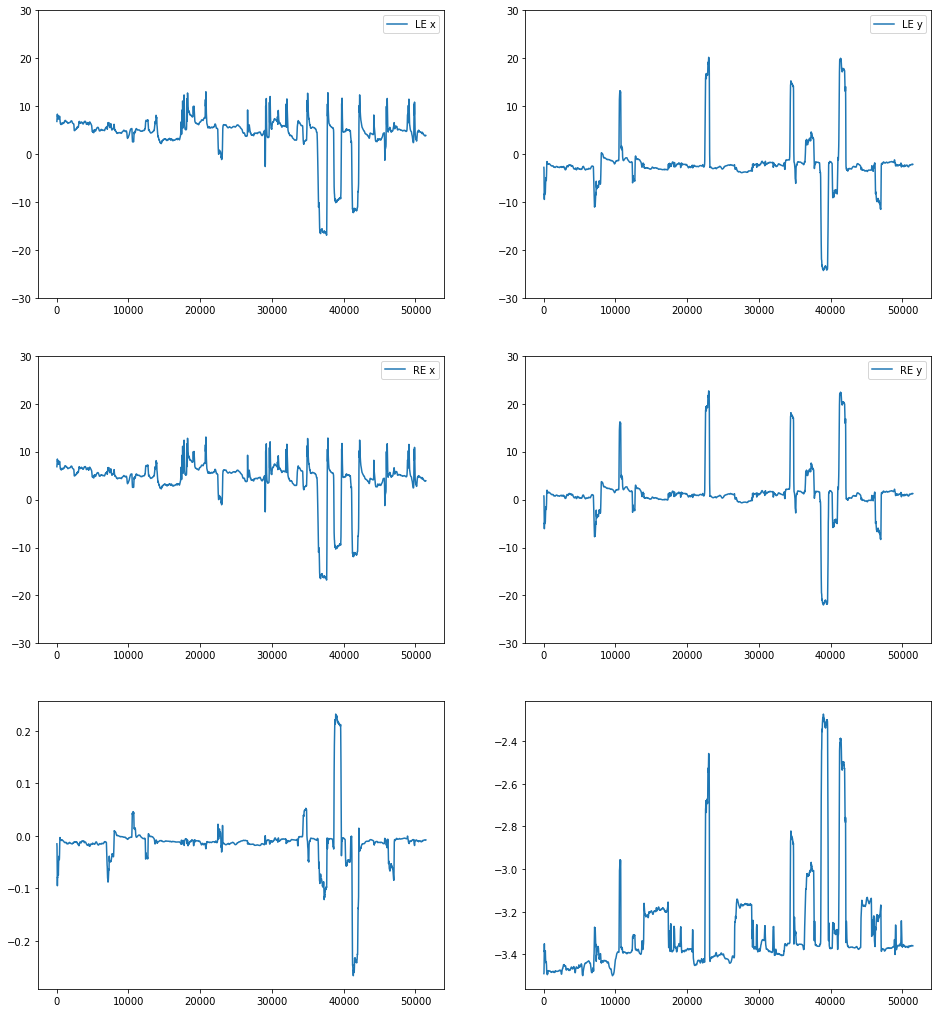

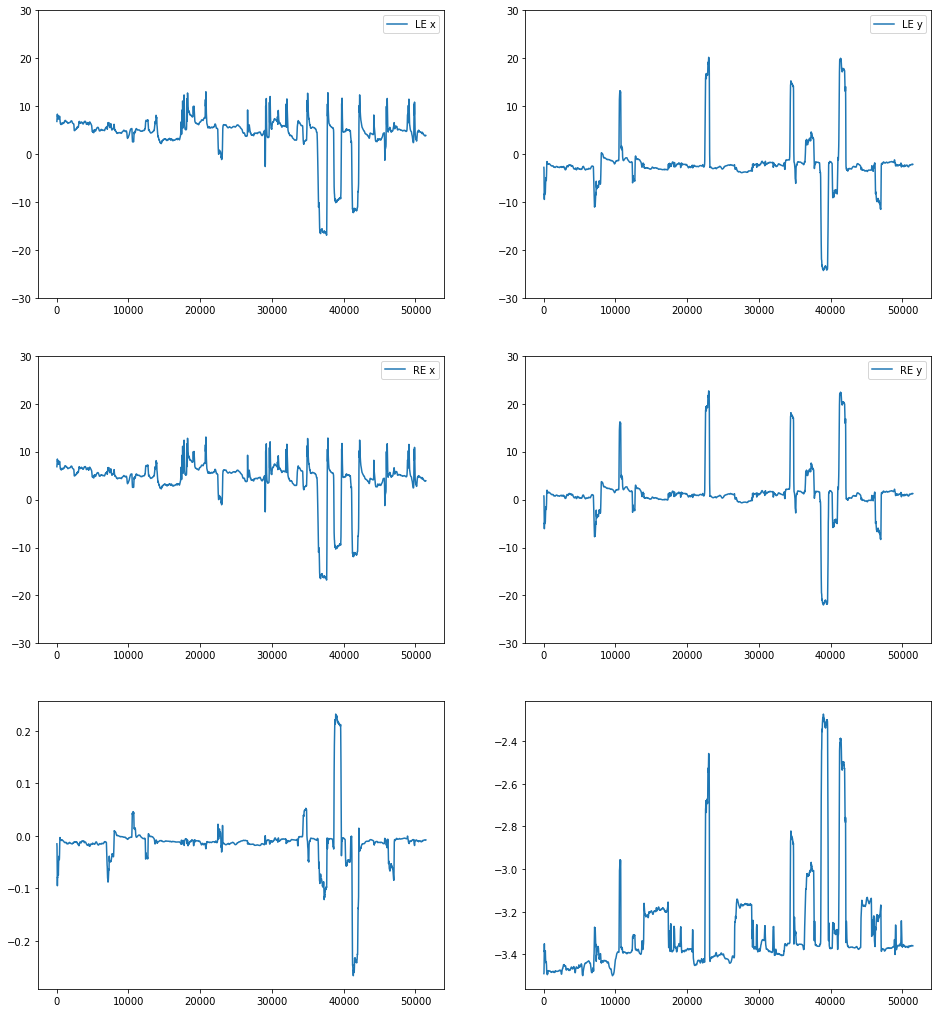

In [65]:
eyeDifference(data)

In [57]:
def eyeDifferenceToFile(dfs = [], names = [], scaledDifference = False):
  for i in range(len(dfs)):
    fig = eyeDifference(dfs[i], scaledDifference)
    saveGraph(fig, f"LE-RE Difference "+names[i])

#End Functions (FINAL)

In [58]:
def outputAllDataAnalysis(dfs = [], names = [], skinnyGraph = True, scaled = True, individualColPairs = False, scaledDifference = False):
  compareSymmetryGraphsToFile(dfs, names, skinnyGraph, scaled)
  symmetryValuesToFile(dfs, names)
  averageValuesToFile(dfs, names, individualColPairs)
  graphAllToFile(dfs, names, True, False)
  eyeDifferenceToFile(dfs, names, scaledDifference)

In [59]:
dfs = [data, data13]
names = ["normal", "ia left cimplex nystag. bilat inos"]
# outputAllDataAnalysis(dfs, names, True, False, False)